In [ ]:
import os
from PIL import Image

# Base path to the directory containing video subfolders (e.g., hate_video_1, non_hate_1)
processed_videos_path = "./ProcessedVideos"

# Desired dimensions for resized frames
target_size = (64, 64)

def resize_frames(frames_folder):
    """
    Resizes all images in the frames folder to the target size.

    Args:
    - frames_folder (str): Path to the 'frames' folder containing image frames.
    """
    for frame_name in os.listdir(frames_folder):
        frame_path = os.path.join(frames_folder, frame_name)
        
        # Check if the file is an image
        if frame_name.endswith((".png", ".jpg", ".jpeg")):
            try:
                # Open the image
                with Image.open(frame_path) as img:
                    # Resize and save the image
                    resized_img = img.resize(target_size, Image.Resampling.LANCZOS)  # Use LANCZOS for high-quality downsampling
                    resized_img.save(frame_path)
                    print(f"Resized: {frame_path}")
            except Exception as e:
                print(f"Error resizing {frame_path}: {e}")

def process_video_folders(base_path):
    """
    Iterates through all subdirectories and resizes frames in the 'frames' folder of each.

    Args:
    - base_path (str): Path to the directory containing video subfolders.
    """
    for video_folder_name in os.listdir(base_path):
        video_folder_path = os.path.join(base_path, video_folder_name)
        
        if os.path.isdir(video_folder_path):  # Check if it's a directory
            frames_folder_path = os.path.join(video_folder_path, "frames")  # Path to 'frames' folder
            
            if os.path.exists(frames_folder_path):  # Check if 'frames' folder exists
                print(f"Processing frames in folder: {frames_folder_path}")
                resize_frames(frames_folder_path)
            else:
                print(f"No 'frames' folder found in: {video_folder_path}")

# Execute the script
if __name__ == "__main__":
    process_video_folders(processed_videos_path)


##cCHECKER

In [ ]:
import os
from PIL import Image

def check_frame_sizes(root_dir):
    """
    Check if all the frames in all 'frames' folders have a size of 64x64.
    :param root_dir: Path to the root directory containing the videos.
    """
    correct_size = (64, 64)
    all_correct = True  # Flag to track if all frames are correctly sized

    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        frames_folder = os.path.join(folder_path, "frames")
        
        if os.path.exists(frames_folder) and os.path.isdir(frames_folder):
            for frame_file in os.listdir(frames_folder):
                frame_path = os.path.join(frames_folder, frame_file)
                
                try:
                    with Image.open(frame_path) as img:
                        if img.size != correct_size:
                            print(f"Incorrect size for: {frame_path}, Size: {img.size}")
                            all_correct = False
                except Exception as e:
                    print(f"Error checking frame: {frame_path}, Error: {e}")

    if all_correct:
        print("All frames are correctly sized to 64x64.")
    else:
        print("Some frames are not correctly sized.")

# Path to your root directory
root_directory = "./ProcessedVideos"
check_frame_sizes(root_directory)


(64, 288, 1, 1)


ValueError: x and y can be no greater than 2D, but have shapes (64,) and (64, 288, 1, 1)

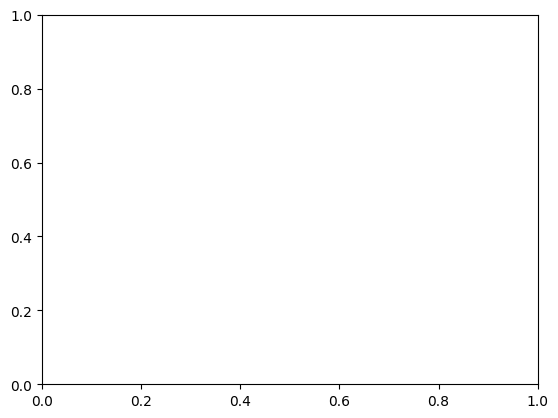

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
data = np.load('onnx__Conv_943.npy')  # Replace 'data.npy' with your file name
print(data.shape)
# Plot the data
plt.plot(data)
plt.title("1D Data Plot")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


Original y shape: (64, 288, 1, 1)
Squeezed y shape: (64, 288)


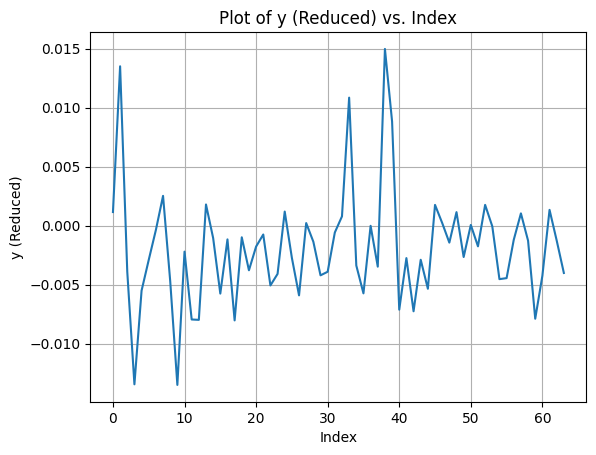

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
y = np.load('onnx__Conv_943.npy')  # Assuming y.npy has shape (64, 288, 1, 1)

# Check the original shape
print("Original y shape:", y.shape)

# Remove the last two dimensions
y_squeezed = np.squeeze(y)  # Removes dimensions of size 1
print("Squeezed y shape:", y_squeezed.shape)

# For plotting, we need to further reduce to a shape compatible with x (e.g., (64,))
# Compute the mean along axis 1 (columns), for example
y_reduced = y_squeezed.mean(axis=1)  # Shape will be (64,)

# Generate a dummy x-axis for visualization (if you don't have x.npy)
x = np.arange(len(y_reduced))  # x-axis with values [0, 1, ..., 63]

# Plot the data
plt.plot(x, y_reduced)
plt.title("Plot of y (Reduced) vs. Index")
plt.xlabel("Index")
plt.ylabel("y (Reduced)")
plt.grid(True)
plt.show()
